## IDATT2502 Anvendt maskinlæring med prosjekt  
# Øving 7 : Unsupervised learning

### Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible). Plot this metric while increasing the number of clusters, e.g., $k=2..30$ 

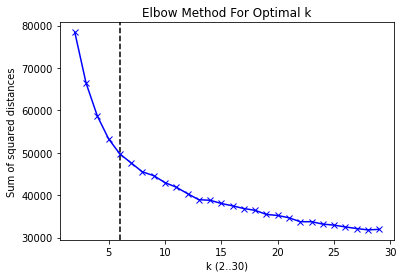

elbow_location = 6


In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

df_mushrooms = pd.read_csv("assets/agaricus-lepiota.csv")
df_dummies = pd.get_dummies(df_mushrooms.drop('edibility', axis='columns'))
X = PCA().fit_transform(df_dummies)

k_means = []
Sum_of_squared_distances = []
K = range(2,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    k_means.append(km)

# selected by analyzing chart
elbow_location = 6
plt.axvline(x=elbow_location, color='k', linestyle='--')

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k (2..30)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print(f"{elbow_location = }")

### Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.*

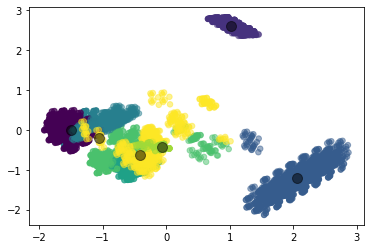

In [13]:
y_kmeans = k_means[elbow_location].predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis', alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)